#### Fetching complete Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os
import platform
import sys

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import nltk
from sklearn.model_selection import train_test_split
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vchopra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import torch
print(torch.__version__)

2.2.0+cu121


In [5]:
import torchtext
print(torchtext.__version__)

0.17.0+cpu


In [6]:
from torchtext.vocab import GloVe
from torchtext.data.utils import get_tokenizer

In [7]:
glove = GloVe(name='6B', dim=100)  # 100-dimensional GloVe embeddings

In [8]:
#  Setting Path to Dataset
def check_if_colab():
    if 'google.colab' in sys.modules:
        return True
    return False

In [9]:
if check_if_colab():
    print("Running on Google Colab")
    # from google.colab import drive
    # drive.mount('/content/drive')
    # BASE_PATH_TO_DATASETS='/content/drive/MyDrive/OMSCS/cs7641/All assignments/Assignments/Assignment-1'
    # BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'pubg')
else:
  if platform.system().lower().__contains__('windows'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE =os.path.join(BASE_PATH_TO_DATASETS, 'code_base')

  elif platform.system().lower().__contains__('linux'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY, 'code_base')
  else:
      print('OS Error')
os.listdir(BASE_PATH_TO_DATASETS)

['DataSet.xlsx',
 'modified_dataset.xlsx',
 'modified_dataset_v1.xlsx',
 'modified_dataset_v2.xlsx',
 'modified_dataset_v3.xlsx']

In [10]:
PATH_TO_DATATSET_XLSX=os.path.join(BASE_PATH_TO_DATASETS, 'modified_dataset_v3.xlsx')
PATH_TO_DATATSET_XLSX

'/media/vchopra/DATA/Complete Technical Work/All  Projects Implemented/Small Projects/Artificial Intelligence Projects/Code Base/Natural_Language_Processing_Projects/Parsec_Assignment/dataset/modified_dataset_v3.xlsx'

In [11]:
df=pd.read_csv(PATH_TO_DATATSET_XLSX)
print(df.columns)
df.head()

Index(['datasheet_link', 'target_col', 'fixed_url', 'pdf_text_sample',
       'link_status_code', 'link_time_taken'],
      dtype='object')


,datasheet_link,target_col,fixed_url,pdf_text_sample,link_status_code,link_time_taken
0,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,EF400 System # EF408B\nDIE CAST CYLINDRICAL LI...,200,1.022151
1,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,EF400 System # EF407B\nDIE CAST CYLINDRICAL LI...,200,0.942223
2,https://www.waclighting.com/storage/waclightin...,lighting,https://www.waclighting.com/storage/waclightin...,ADJUSTABLE BEAM WALL WASH 12V\n5221\nORDERING ...,200,0.800955
3,https://www.acuitybrands.com/api/products/geta...,lighting,https://www.acuitybrands.com/api/products/geta...,Type:\nProject:\nHDMC\nSurface Mount with FAR-...,200,3.050464
4,https://lfillumination.com/files/specsheets/KA...,lighting,https://lfillumination.com/files/specsheets/KA...,Extruded Aluminum\nHousing\nSatin Acrylic\nDif...,200,0.790676


#### Basic Distribution Plot

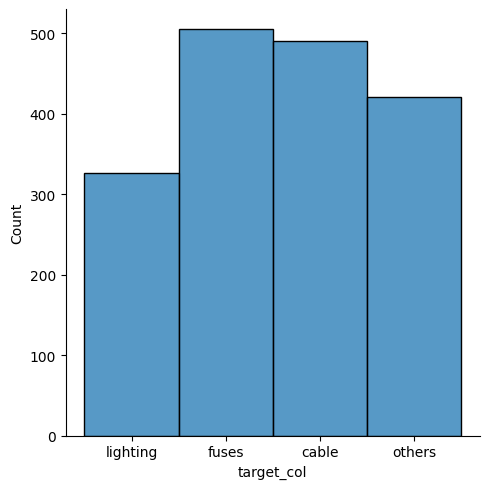

In [12]:
sns.displot(df['target_col'])

In [13]:
df['target_col'].value_counts()

target_col
fuses       505
cable       491
others      421
lighting    327
Name: count, dtype: int64

In [14]:
print(df.info())  # Check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datasheet_link    1744 non-null   object 
 1   target_col        1744 non-null   object 
 2   fixed_url         1744 non-null   object 
 3   pdf_text_sample   1744 non-null   object 
 4   link_status_code  1744 non-null   int64  
 5   link_time_taken   1744 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 81.9+ KB
None


In [15]:
print(df['pdf_text_sample'].apply(len).describe())  # Length distribution of text

count      1744.000000
mean       7874.182913
std       11595.564751
min         359.000000
25%        3205.000000
50%        5790.000000
75%        8169.000000
max      259582.000000
Name: pdf_text_sample, dtype: float64


In [16]:
print(df.isna().sum())

datasheet_link      0
target_col          0
fixed_url           0
pdf_text_sample     0
link_status_code    0
link_time_taken     0
dtype: int64


### Basic Data cleaning 

In [17]:
text_column= 'pdf_text_sample'

In [18]:
from nltk.corpus import stopwords, words
import nltk

nltk.download('stopwords')
nltk.download('words')
stop_words = set(stopwords.words('english'))
valid_words = set(words.words())            # Load English dictionary

import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/vchopra/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [19]:
import re
# import re

# def clean_text(text):
#     text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets
#     text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
#     return text.strip()
# df['pdf_text_sample_cleaned'] = df[text_column].apply(clean_text)

def remove_line_breaks(text):
    # Replace line breaks with space if not at the end of a sentence
    text = re.sub(r'\n+', ' ', text)  # Replace multiple newlines
    text = re.sub(r'(\S)\n(\S)', r'\1 \2', text)  # Handle breaks within sentences
    text = re.sub(r'([a-z])\-\n([a-z])', r'\1\2', text)  # Fix hyphenated words across lines
    return text

def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()  # Trim leading/trailing spaces

def remove_special_characters(text):
    # Keep only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_page_headers(text):
    # Example: Remove "Page 1 of 20"
    text = re.sub(r'page \d+\s?(of\s?\d+)?', '', text, flags=re.IGNORECASE)
    return text



def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def fix_broken_words(text):
    # Fix hyphenated words that break across lines
    text = re.sub(r'(\w+)-\s(\w+)', r'\1\2', text)
    return text

def dictionary_filter(text):
    return ' '.join([word for word in text.split() if word.lower() in valid_words])


def remove_entities(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.ent_type_])

def clean_pdf_text(text:str):
    text = text.lower()
    text = remove_line_breaks(text)
    text = remove_extra_spaces(text)
    text = fix_broken_words(text)
    text = remove_special_characters(text)
    text = remove_page_headers(text)
    text = remove_stopwords(text)
    text = dictionary_filter(text)
    text = remove_entities(text)
    return text

df['pdf_text_sample_cleaned'] = df[text_column].apply(clean_pdf_text)

In [20]:
df['pdf_text_sample_cleaned'] = df['pdf_text_sample_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

In [21]:
### Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['pdf_text_sample_cleaned'] = df['pdf_text_sample_cleaned'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /home/vchopra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### EDA

In [22]:
df['word_count'] = df['pdf_text_sample_cleaned'].apply(lambda x: len(x.split()))
df['word_count'].describe()

count    1744.000000
mean      415.204128
std       658.542356
min        24.000000
25%       180.750000
50%       295.000000
75%       385.000000
max      8310.000000
Name: word_count, dtype: float64

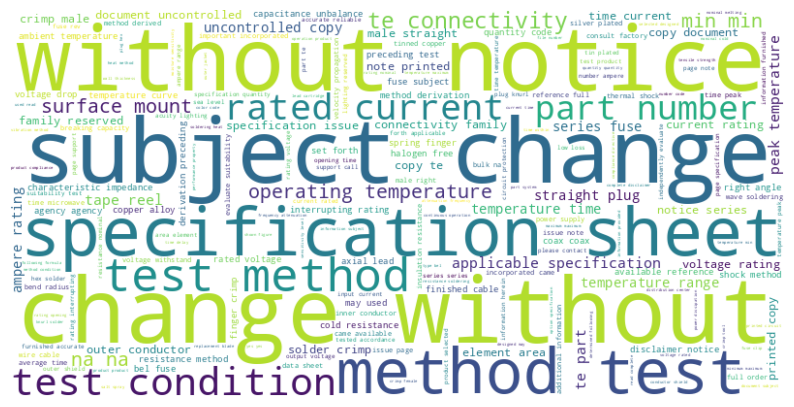

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['pdf_text_sample_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


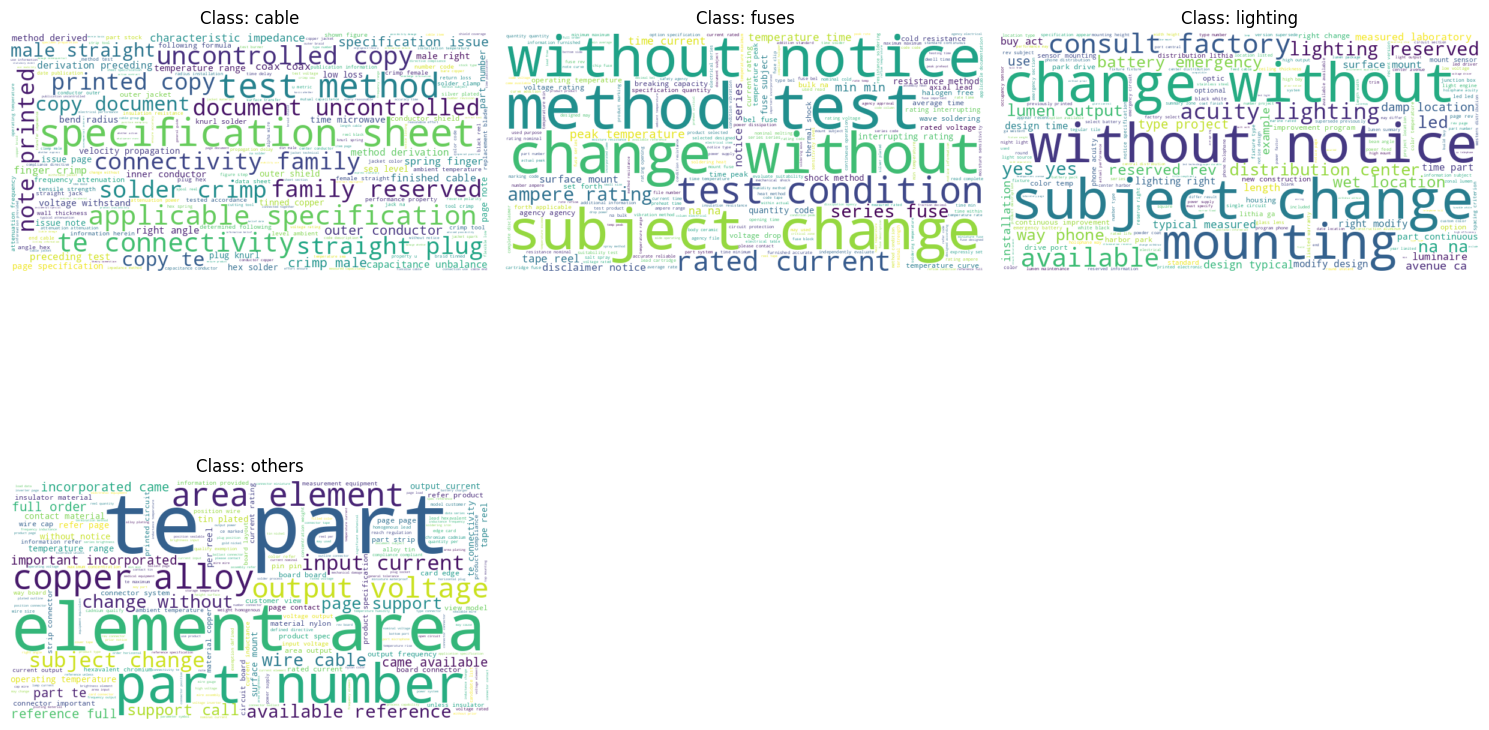

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_per_class(df, text_column, class_column):
    # Group by class and combine text for each class
    grouped = df.groupby(class_column)[text_column].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(15, 10))

    # Generate a word cloud for each class
    for i, (label, text) in enumerate(grouped.items()):
        plt.subplot(2, 3, i + 1)  # Adjust grid if necessary
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Class: {label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example Usage
plot_wordcloud_per_class(df, text_column='pdf_text_sample_cleaned', class_column='target_col')

In [25]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Bigram Analysis
# vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
# bigram_matrix = vectorizer.fit_transform(df['pdf_text_sample_cleaned'])
# bigram_counts = dict(zip(vectorizer.get_feature_names_out(), bigram_matrix.sum(axis=0).flat))
# print(bigram_counts)


### Basic Feature Engineering

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['pdf_text_sample_cleaned'], df['target_col'], 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['target_col'])

#### Save training and testing data

### Basic Bag of Words Implementation

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))

In [28]:
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.fit_transform(X_test)

In [29]:
list(tfidf.get_feature_names_out())

['aa',
 'accessory',
 'accordance',
 'according',
 'accuracy',
 'accurate',
 'accurate reliable',
 'accurate reliable however',
 'acting',
 'actual',
 'actual peak',
 'actual peak temperature',
 'acuity',
 'acuity lighting',
 'acuity lighting reserved',
 'adapter',
 'addition',
 'addition standard',
 'addition standard continuous',
 'additional',
 'additional information',
 'adjustable',
 'agency',
 'agency agency',
 'agency agency agency',
 'agency agency file',
 'agency file',
 'agency file number',
 'air',
 'alloy',
 'alpha',
 'also',
 'aluminum',
 'ambient',
 'ambient temperature',
 'ampere',
 'ampere range',
 'ampere rating',
 'ampere rating opening',
 'angle',
 'appendix',
 'applicable',
 'applicable documentation',
 'applicable specification',
 'applicable specification sheet',
 'application',
 'applied',
 'apply',
 'appropriate',
 'approval',
 'approximately',
 'area',
 'arm',
 'assembly',
 'attach',
 'attached',
 'attenuation',
 'attenuation frequency',
 'attenuator',
 'automo

In [30]:
X_train_vectorized.shape, X_test_vectorized.shape, y_train.shape, y_test.shape

((1395, 1000), (349, 1000), (1395,), (349,))

### Modelling

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_train.value_counts()

target_col
fuses       404
cable       393
others      337
lighting    261
Name: count, dtype: int64

#### Evaluation

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5931232091690545
              precision    recall  f1-score   support

       cable       0.85      0.47      0.61        98
       fuses       1.00      0.46      0.63       101
    lighting       0.84      0.48      0.62        66
      others       0.39      0.99      0.56        84

    accuracy                           0.59       349
   macro avg       0.77      0.60      0.60       349
weighted avg       0.78      0.59      0.60       349

[[46  0  1 51]
 [ 2 46  4 49]
 [ 6  0 32 28]
 [ 0  0  1 83]]


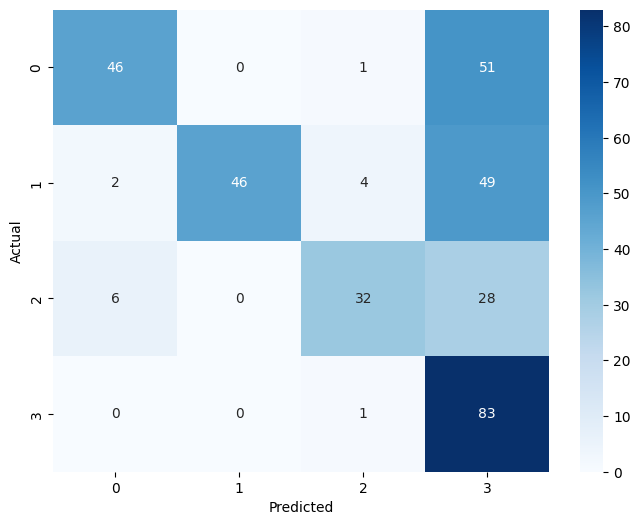

In [34]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [35]:
y_pred_train = model.predict(X_train_vectorized)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


Accuracy: 0.9978494623655914
              precision    recall  f1-score   support

       cable       1.00      0.99      1.00       393
       fuses       1.00      1.00      1.00       404
    lighting       1.00      1.00      1.00       261
      others       0.99      1.00      1.00       337

    accuracy                           1.00      1395
   macro avg       1.00      1.00      1.00      1395
weighted avg       1.00      1.00      1.00      1395

[[391   0   0   2]
 [  0 403   0   1]
 [  0   0 261   0]
 [  0   0   0 337]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7077363896848138
              precision    recall  f1-score   support

       cable       0.94      0.50      0.65        98
       fuses       0.99      0.89      0.94       101
    lighting       0.93      0.41      0.57        66
      others       0.46      0.96      0.62        84

    accuracy                           0.71       349
   macro avg       0.83      0.69      0.69       349
weighted avg       0.84      0.71      0.71       349

[[49  0  0 49]
 [ 3 90  0  8]
 [ 0  0 27 39]
 [ 0  1  2 81]]


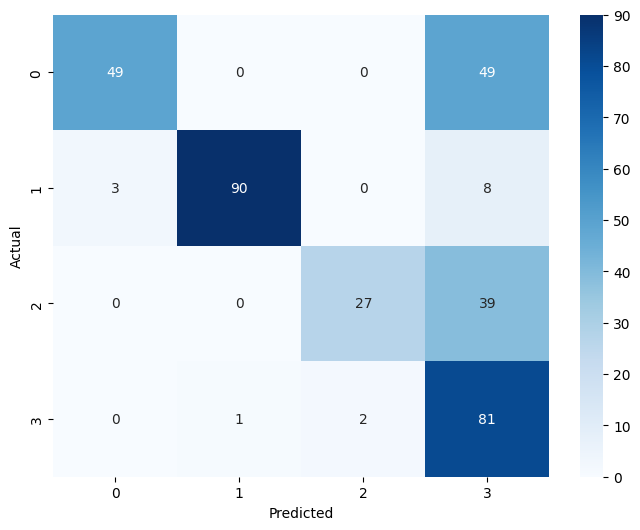

In [38]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
y_pred_train = model.predict(X_train_vectorized)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


Accuracy: 1.0
              precision    recall  f1-score   support

       cable       1.00      1.00      1.00       393
       fuses       1.00      1.00      1.00       404
    lighting       1.00      1.00      1.00       261
      others       1.00      1.00      1.00       337

    accuracy                           1.00      1395
   macro avg       1.00      1.00      1.00      1395
weighted avg       1.00      1.00      1.00      1395

[[393   0   0   0]
 [  0 404   0   0]
 [  0   0 261   0]
 [  0   0   0 337]]


### Embedding Based Classification

In [47]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch
tokenizer = get_tokenizer("basic_english")


In [48]:
# Tokenize the dataset
df['tokenized_text'] = df['pdf_text_sample_cleaned'].apply(tokenizer)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['tokenized_text'], df['target_col'], 
    test_size=0.2, random_state=42, stratify=df['target_col']
)

In [51]:
X_train

347     [type, surface, mount, chip, fuse, series, siz...
873     [coaxial, hardware, coaxial, hardware, flexibl...
499     [fuse, subject, change, without, notice, serie...
1392    [transmission, coax, braid, product, descripti...
1511    [highway, south, alpha, web, customer, specifi...
                              ...                        
513     [pigtail, circuit, protection, axial, lead, fu...
295     [way, phone, acuity, lighting, reserved, comme...
1055    [industrial, connector, miniature, series, te,...
1172    [standard, card, edge, general, description, p...
87      [due, constant, improvement, led, technology, ...
Name: tokenized_text, Length: 1395, dtype: object

In [50]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [41]:
from torchtext.vocab import build_vocab_from_iterator

# Token generator to yield tokens from training data
def yield_tokens(data_iter):
    for tokens in data_iter:
        yield tokens

# Build vocabulary from iterator
vocab = build_vocab_from_iterator(yield_tokens(X_train), specials=['<unk>', '<pad>'])
vocab.set_default_index(vocab['<unk>'])

In [42]:
def pad_sequence(seq, max_len=50):
    if len(seq) > max_len:
        return seq[:max_len]
    return seq + [vocab['<pad>']] * (max_len - len(seq))

X_train = [pad_sequence(text) for text in X_train]
X_test = [pad_sequence(text) for text in X_test]


In [44]:
embedding_matrix = torch.zeros(len(vocab), 100)

for i, word in enumerate(vocab.get_itos()):
    if word in glove.stoi:
        embedding_matrix[i] = glove[word]
    else:
        embedding_matrix[i] = torch.randn(100)  # Random for unknown words

In [56]:
def numericalize_and_pad(texts, vocab, max_len=50):
    return [pad_sequence([vocab[token] for token in text], max_len) for text in texts]

X_train = numericalize_and_pad(X_train, vocab)
X_test = numericalize_and_pad(X_test, vocab)


In [58]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = [torch.tensor(text, dtype=torch.long) for text in texts]
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

train_dataset = TextDataset(X_train, y_train_encoded)
test_dataset = TextDataset(X_test, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [59]:
for texts, labels in train_loader:
    print("Batch Text Shape:", texts.shape)
    print("Batch Label Shape:", labels.shape)
    break

Batch Text Shape: torch.Size([4, 50])
Batch Label Shape: torch.Size([4])


In [60]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx):
        super(LSTMClassifier, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.embedding.weight.data.copy_(embedding_matrix)
        self.embedding.weight.requires_grad = False  # Freeze embeddings

        # LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        lstm_out, (hidden, _) = self.lstm(embedded)
        return self.fc(hidden[-1])

In [61]:
embedding_dim = 100
hidden_dim = 128
output_dim = len(label_encoder.classes_)
vocab_size = len(vocab)
pad_idx = vocab['<pad>']

model = LSTMClassifier(vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [63]:
import matplotlib.pyplot as plt

def train(model, train_loader, test_loader, optimizer, criterion, epochs=10, patience=3):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # LR Decay
    best_val_loss = float('inf')
    no_improve_epochs = 0
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct_train = 0
        total_train = 0
        
        # Training
        for texts, labels in train_loader:
            optimizer.zero_grad()
            output = model(texts)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            # Calculate training accuracy
            predictions = torch.argmax(output, dim=1)
            correct_train += (predictions == labels).sum().item()
            total_train += labels.size(0)

        # Record Training Loss/Accuracy
        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)
        print(f"Epoch {epoch+1} | Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f}")

        # Validation
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for texts, labels in test_loader:
                output = model(texts)
                val_loss = criterion(output, labels)
                total_val_loss += val_loss.item()
                
                predictions = torch.argmax(output, dim=1)
                correct_val += (predictions == labels).sum().item()
                total_val += labels.size(0)

        # Record Validation Loss/Accuracy
        val_losses.append(total_val_loss / len(test_loader))
        val_accuracies.append(correct_val / total_val)
        print(f"Validation Loss: {val_losses[-1]:.4f} | Validation Acc: {val_accuracies[-1]:.4f}")
        
        # LR Scheduler Step
        scheduler.step()

        # Early Stopping
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            no_improve_epochs = 0
            torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
        else:
            no_improve_epochs += 1
            if no_improve_epochs >= patience:
                print("Early stopping triggered.")
                break
    
    # Plot Accuracy and Loss
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)


def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Epoch 1 | Train Loss: 0.0493 | Train Acc: 0.9835
Validation Loss: 0.0315 | Validation Acc: 0.9943
Epoch 2 | Train Loss: 0.0286 | Train Acc: 0.9907
Validation Loss: 0.0497 | Validation Acc: 0.9799
Epoch 3 | Train Loss: 0.0279 | Train Acc: 0.9921
Validation Loss: 0.0317 | Validation Acc: 0.9857
Epoch 4 | Train Loss: 0.0092 | Train Acc: 0.9993
Validation Loss: 0.0184 | Validation Acc: 0.9971
Epoch 5 | Train Loss: 0.0064 | Train Acc: 0.9993
Validation Loss: 0.0171 | Validation Acc: 0.9971
Epoch 6 | Train Loss: 0.0054 | Train Acc: 0.9993
Validation Loss: 0.0161 | Validation Acc: 0.9971
Epoch 7 | Train Loss: 0.0049 | Train Acc: 0.9993
Validation Loss: 0.0160 | Validation Acc: 0.9971
Epoch 8 | Train Loss: 0.0048 | Train Acc: 0.9993
Validation Loss: 0.0159 | Validation Acc: 0.9971
Epoch 9 | Train Loss: 0.0047 | Train Acc: 0.9993
Validation Loss: 0.0158 | Validation Acc: 0.9971
Epoch 10 | Train Loss: 0.0047 | Train Acc: 0.9993
Validation Loss: 0.0158 | Validation Acc: 0.9971
Epoch 11 | Train Lo

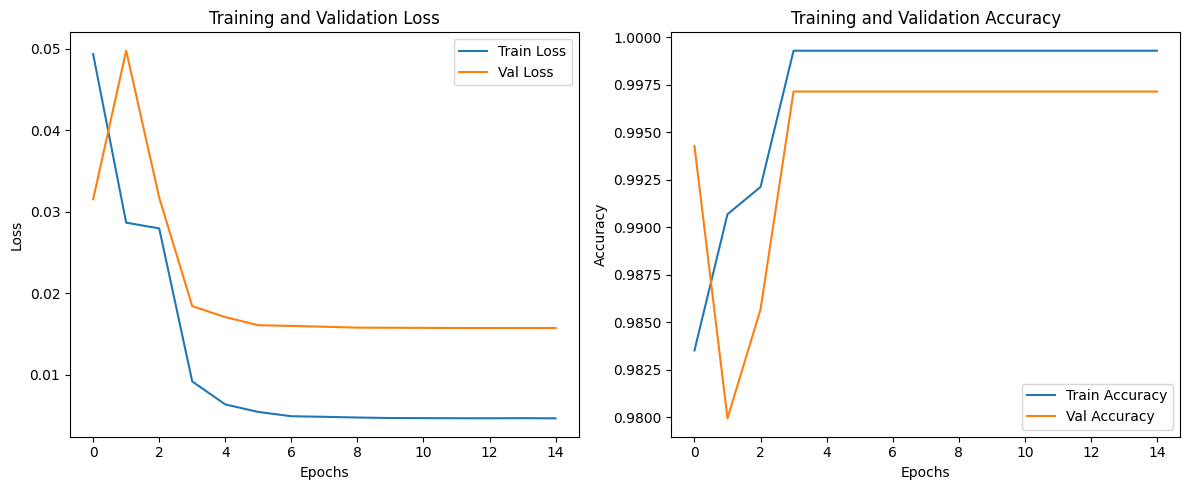

In [64]:
train(model, train_loader, test_loader, optimizer, criterion, epochs=15, patience=5)

Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00       101
           2       0.99      1.00      0.99        66
           3       1.00      1.00      1.00        84

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



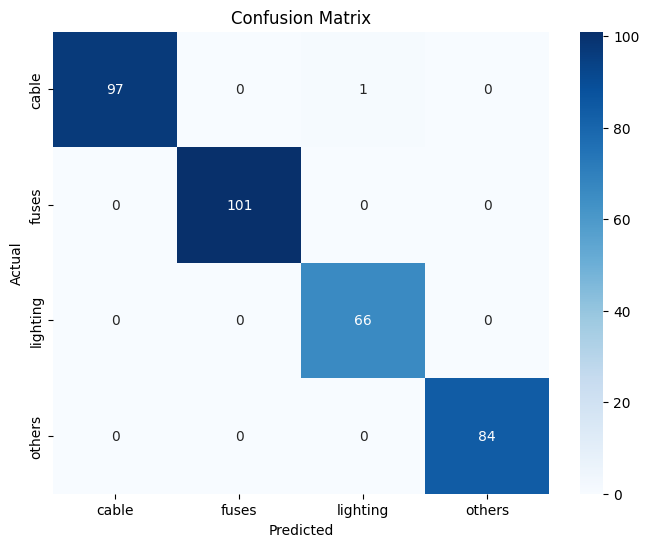

In [70]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


y_true = []
y_pred = []

with torch.no_grad():
    for texts, labels in test_loader:
        output = model(texts)
        predictions = torch.argmax(output, dim=1)
        
        # Extend using torch operations instead of numpy
        y_true.extend(labels.detach().cpu().tolist())
        y_pred.extend(predictions.detach().cpu().tolist())

# Print accuracy
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save the model
torch.save(model.state_dict(), 'lstm_model.pth')
print("Model saved successfully.")

Model saved successfully.


In [73]:
# Save the vocabulary to a file
torch.save(vocab, 'vocab.pth')
print("Vocabulary saved successfully.")

Vocabulary saved successfully.


In [74]:
# Save the LabelEncoder to a file
torch.save(label_encoder.classes_, 'label_encoder.pth')
print("Label Encoder saved successfully.")

Label Encoder saved successfully.
